# Data Mining and Discovery <br>
## Report Assignment
**Nazmul Hossain** | **23015862**

## Import necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score

from sklearn.feature_selection import SelectKBest, f_regression

from scipy.stats import zscore

## Choose and load a dataset from `datasets.txt`

Air Quality Data Set (UCI), regression - https://archive.ics.uci.edu/ml/datasets/Air+Quality

In [ ]:
air_quality_df = pd.read_csv('dataset/AirQualityUCI.csv', sep=';')
air_quality_df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


## Dataset preprocessing

In [ ]:
air_quality_df.shape

(9471, 17)

In [ ]:
air_quality_df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')

In [ ]:
air_quality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


In [ ]:
air_quality_df.describe()

,PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),Unnamed: 15,Unnamed: 16
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,0.0,0.0
mean,1048.990061,-159.090093,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,NaN,NaN
std,329.832710,139.789093,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,NaN,NaN
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,NaN,NaN
25%,921.000000,-200.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,NaN,NaN
50%,1053.000000,-200.000000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,NaN,NaN
75%,1221.000000,-200.000000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,NaN,NaN
max,2040.000000,1189.000000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,NaN,NaN


In [ ]:
air_quality_df.isnull().sum()

,0
Date,114
Time,114
CO(GT),114
PT08.S1(CO),114
NMHC(GT),114
C6H6(GT),114
PT08.S2(NMHC),114
NOx(GT),114
PT08.S3(NOx),114
NO2(GT),114


### Handling missing values

In [ ]:
# Drop unnecessary columns
air_quality_df = air_quality_df.drop(columns=['Unnamed: 15', 'Unnamed: 16'])

In [ ]:
# Fill missing numeric values with the column mean
numeric_cols = air_quality_df.select_dtypes(include=['float64', 'int64']).columns
air_quality_df[numeric_cols] = air_quality_df[numeric_cols].fillna(air_quality_df[numeric_cols].mean())

print(air_quality_df.isnull().sum())

Date             114
Time             114
CO(GT)           114
PT08.S1(CO)        0
NMHC(GT)           0
C6H6(GT)         114
PT08.S2(NMHC)      0
NOx(GT)            0
PT08.S3(NOx)       0
NO2(GT)            0
PT08.S4(NO2)       0
PT08.S5(O3)        0
T                114
RH               114
AH               114
dtype: int64


In [ ]:
# Drop rows with missing values in key columns
air_quality_df = air_quality_df.dropna(subset=['CO(GT)', 'C6H6(GT)', 'T', 'RH'])

### Convert Numeric Columns

In [ ]:
# Convert numeric columns with commas to floats
cols_to_convert = ['CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH']
for col in cols_to_convert:
    air_quality_df[col] = air_quality_df[col].str.replace(',', '.').astype(float)

In [ ]:
air_quality_df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [ ]:
# Check data types and null values
print(air_quality_df.info())
print(air_quality_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB
None
Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)        

  ### Define target and feature variables
Target variable `y`: `CO(GT)` (Carbon Monoxide levels)

In [ ]:
# Features (X) and target variable (y)
X = air_quality_df.drop(columns=['CO(GT)', 'Date', 'Time'], axis=True)
y = air_quality_df['CO(GT)']

# # Outlier detection and removal
# z_scores = np.abs(zscore(X, nan_policy='omit'))
# X = X[(z_scores < 3).all(axis=1)]
# y = y[(z_scores < 3).all(axis=1)]

# # Feature engineering: Create interaction terms
# X['T_RH_interaction'] = X['T'] * X['RH']
# X['NOx_NO2_interaction'] = X['PT08.S3(NOx)'] * X['PT08.S4(NO2)']
# X['O3_T_interaction'] = X['PT08.S5(O3)'] * X['T']

### Train test split

In [ ]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (7485, 12)
Testing set shape: (1872, 12)


### Some more preprocessing using `StandardScaler` and `PolynomialFeatures`

In [ ]:
# Standardize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add polynomial features (degree=3)
poly = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

## Apply subtopic 1 (Linear Regression) to the dataset

### `LinearRegression` Model Train and Evaluate

In [ ]:
# Initialize and train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_poly, y_train)

# Predict on test set
y_pred = lr_model.predict(X_test_poly)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Results:")
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

Linear Regression Results:
Mean Squared Error (MSE): 2317.066565261518
R² Score: 0.6078166593017627


### Visualisation for Linear Regression model

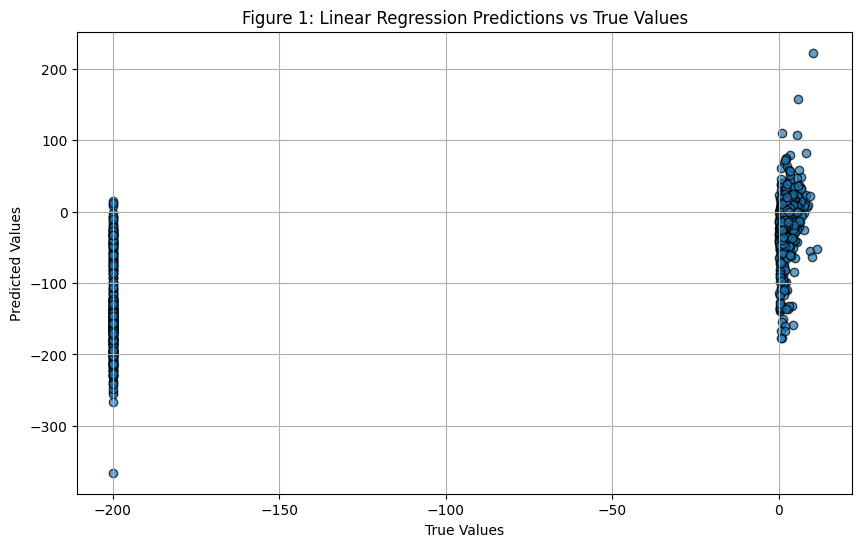

In [ ]:
# Visualization for regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolor='k')
plt.title("Figure 1: Linear Regression Predictions vs True Values")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.grid()
plt.show()

### `Ridge` Regression model training

In [ ]:
ridge_model = Ridge(alpha=0.5)
ridge_model.fit(X_train_poly, y_train)
y_pred_ridge = ridge_model.predict(X_test_poly)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression MSE:", mse_ridge)
print("Ridge Regression R² Score:", r2_ridge)

Ridge Regression MSE: 2368.1754784521363
Ridge Regression R² Score: 0.5991660384628699


### `Lasso` Regression model training

In [ ]:
lasso_model = Lasso(alpha=0.2)
lasso_model.fit(X_train_poly, y_train)
y_pred_lasso = lasso_model.predict(X_test_poly)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Lasso Regression MSE:", mse_lasso)
print("Lasso Regression R² Score:", r2_lasso)

Lasso Regression MSE: 2475.77054226085
Lasso Regression R² Score: 0.5809546533435224


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.303e+06, tolerance: 4.536e+03
  model = cd_fast.enet_coordinate_descent(


In [ ]:
# Hyperparameter tuning for Linear Regression using Ridge and Lasso
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso_params = {'alpha': [0.01, 0.1, 1, 10, 100]}

ridge_grid = GridSearchCV(Ridge(), ridge_params, scoring='neg_mean_squared_error', cv=5)
ridge_grid.fit(X_train_scaled, y_train)
lasso_grid = GridSearchCV(Lasso(max_iter=10000), lasso_params, scoring='neg_mean_squared_error', cv=5)
lasso_grid.fit(X_train_scaled, y_train)

best_ridge = ridge_grid.best_estimator_
best_lasso = lasso_grid.best_estimator_

print("Best Ridge Parameters:", ridge_grid.best_params_)
print("Best Lasso Parameters:", lasso_grid.best_params_)

# Evaluate Ridge
ridge_pred = best_ridge.predict(X_test_scaled)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)
print("\nRidge Regression Results:")
print("Mean Squared Error (MSE):", ridge_mse)
print("R² Score:", ridge_r2)

# Evaluate Lasso
lasso_pred = best_lasso.predict(X_test_scaled)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)
print("\nLasso Regression Results:")
print("Mean Squared Error (MSE):", lasso_mse)
print("R² Score:", lasso_r2)

Best Ridge Parameters: {'alpha': 10}
Best Lasso Parameters: {'alpha': 0.01}

Ridge Regression Results:
Mean Squared Error (MSE): 2863.388604381811
R² Score: 0.5153469799185606

Lasso Regression Results:
Mean Squared Error (MSE): 2863.031727564033
R² Score: 0.5154073843733624


### Trying Non-Linear Regression like `XGBRegressor`

In [ ]:
from xgboost import XGBRegressor
# XGBoost Regressor
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Hyperparameter tuning for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

xgb_grid = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, scoring='neg_mean_squared_error', verbose=1)
xgb_grid.fit(X_train_scaled, y_train)

# Best estimator
best_xgb = xgb_grid.best_estimator_
print("Best XGBoost Parameters:", xgb_grid.best_params_)

# Predict and evaluate XGBoost
xgb_pred = best_xgb.predict(X_test_scaled)
xgb_mse = mean_squared_error(y_test, xgb_pred)
xgb_r2 = r2_score(y_test, xgb_pred)
print("\nXGBoost Regression Results:")
print("Mean Squared Error (MSE):", xgb_mse)
print("R² Score:", xgb_r2)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best XGBoost Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}

XGBoost Regression Results:
Mean Squared Error (MSE): 2099.981718925431
R² Score: 0.644560126894564


## Apply subtopic 2 (Classification)

### Binarize the target variable
Low CO vs High CO:
- 1 if CO >= 2
- 0 otherwise

In [ ]:
y_class = (y > y.median()).astype(int)
print(y_class.value_counts())
# Split the data
X_train, X_test, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=42)

CO(GT)
0    4858
1    4499
Name: count, dtype: int64


### `LogisticRegression` model training

In [ ]:
# Train a Logistic Regression model
clf_logistic = LogisticRegression(max_iter=5000)
clf_logistic.fit(X_train, y_train_class)

# Predict on test set
y_pred_class = clf_logistic.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test_class, y_pred_class)

print("\nLogistic Regression Results:")
print("Classification Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test_class, y_pred_class))


Logistic Regression Results:
Classification Accuracy: 0.907051282051282

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91       983
           1       0.89      0.92      0.90       889

    accuracy                           0.91      1872
   macro avg       0.91      0.91      0.91      1872
weighted avg       0.91      0.91      0.91      1872



### Visualisation for Logistic Regression model

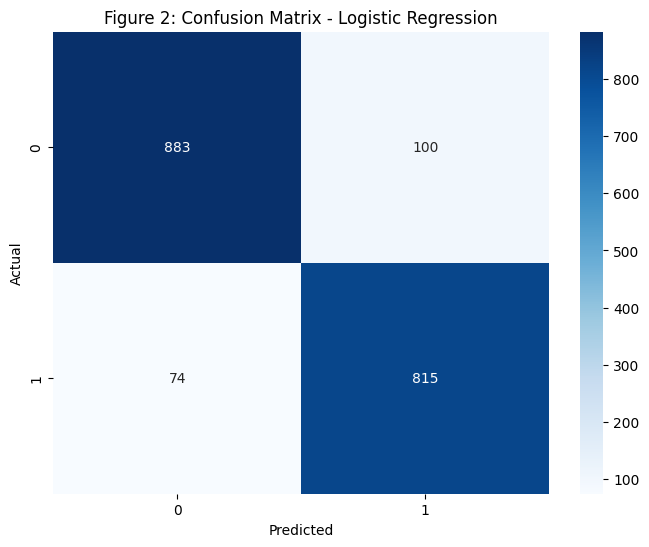

In [ ]:
# Visualization for classification results
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_class, y_pred_class), annot=True, fmt='d', cmap='Blues')
plt.title("Figure 2: Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### `RandomForestClassifier` model training

In [ ]:
clf_rf = RandomForestClassifier(random_state=42)
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 20]}
rf_grid = GridSearchCV(clf_rf, param_grid, scoring='accuracy', cv=5)
rf_grid.fit(X_train, y_train_class)

# Predict and evaluate random forest
best_rf = rf_grid.best_estimator_
y_pred_rf = best_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test_class, y_pred_rf)
print("\nRandom Forest Results:")
print("Best Parameters:", rf_grid.best_params_)
print("Accuracy:", accuracy_rf)
print("\nClassification Report:\n", classification_report(y_test_class, y_pred_rf))


Random Forest Results:
Best Parameters: {'max_depth': 20, 'n_estimators': 200}
Accuracy: 0.9220085470085471

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.92       983
           1       0.91      0.93      0.92       889

    accuracy                           0.92      1872
   macro avg       0.92      0.92      0.92      1872
weighted avg       0.92      0.92      0.92      1872



In [ ]:
# Cross-validation scores
cv_scores_logistic = cross_val_score(clf_logistic, X, y_class, cv=5, scoring='accuracy')
cv_scores_rf = cross_val_score(best_rf, X, y_class, cv=5, scoring='accuracy')
print("\nCross-validation Results:")
print("Logistic Regression Accuracy:", cv_scores_logistic.mean())
print("Random Forest Accuracy:", cv_scores_rf.mean())


Cross-validation Results:
Logistic Regression Accuracy: 0.8671701909943492
Random Forest Accuracy: 0.8728225342268635


### Visualisation for Random Forest Classification model

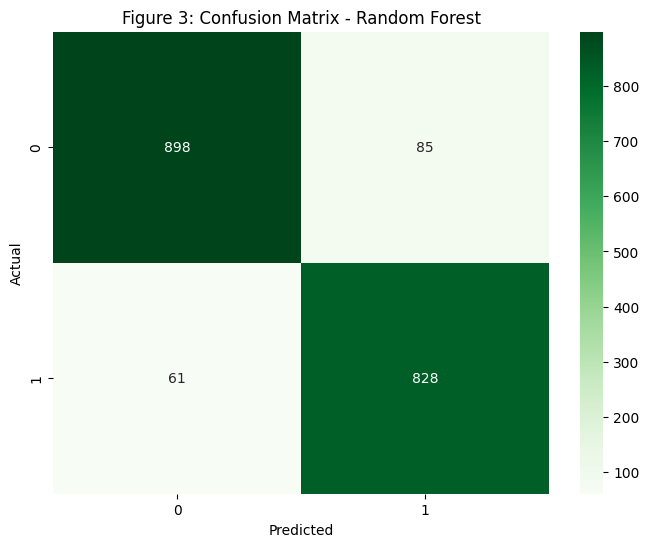

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_class, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Figure 3: Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()